## Importing the  depedancies

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *


### Load Dataset

In [319]:
car_df=pd.read_csv("car data.csv")  # use pd.read_csv to read csv file and store as car_df variable

In [320]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### Show as 301 Rows and 9 Columns

In [321]:
car_df.shape

(301, 9)

In [322]:
car_df.info()    #Check information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [323]:
car_df.isnull().sum()  #checking Missing Values 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Data  preprocessing

In [324]:
car_df=car_df.drop(columns="Car_Name")       # Drop car_name columne no significant Role for Machine Model beacuse have numbers of  unique Values

In [325]:
cat_column=car_df.select_dtypes(object)   # Seperate of the categorical column to lableing.

In [326]:
cat_column # show CAtegorical data

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


# Create Function to find number of unique values and uniuqe values.

In [327]:
def check_unique(data):
    for i in data.columns:
        unique=data[i].value_counts()
        print(unique)

    

In [328]:
check_unique(cat_column)

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


## Show Here Fuel_type have 3 unique value so use get_dummies dunction convert lableing.

In [329]:
p=pd.get_dummies(car_df["Fuel_Type"])

In [330]:
p

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [331]:
car_df=pd.concat([car_df,p],axis=1)    #concate with car_df dummies values

In [332]:
car_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,0,1,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,1
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,1
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,0,1,0


## Maping categorical data to numerical values.

In [333]:
car_df["Transmission"]=car_df["Transmission"].map({"Manual":0
,"Automatic":1 })

In [334]:
car_df.drop(columns="Fuel_Type",inplace=True,axis=1)  # Drop column fuel_type 

In [335]:
car_df["Seller_Type"]=car_df["Seller_Type"].map({"Dealer":0,
"Individual":1})

In [336]:
car_df       #show data after maping

,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,2014,3.35,5.59,27000,0,0,0,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,1,0
2,2017,7.25,9.85,6900,0,0,0,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0,0,0,1,0
297,2015,4.00,5.90,60000,0,0,0,0,0,1
298,2009,3.35,11.00,87934,0,0,0,0,0,1
299,2017,11.50,12.50,9000,0,0,0,0,1,0


## Store Dependend(Target) and Independed column  in y variable and x variable.

In [337]:
x=car_df.drop(columns="Selling_Price")
y=car_df["Selling_Price"]

In [338]:
x,y  # show x and y 

(     Year  Present_Price  Kms_Driven  Seller_Type  Transmission  Owner  CNG  \
 0    2014           5.59       27000            0             0      0    0   
 1    2013           9.54       43000            0             0      0    0   
 2    2017           9.85        6900            0             0      0    0   
 3    2011           4.15        5200            0             0      0    0   
 4    2014           6.87       42450            0             0      0    0   
 ..    ...            ...         ...          ...           ...    ...  ...   
 296  2016          11.60       33988            0             0      0    0   
 297  2015           5.90       60000            0             0      0    0   
 298  2009          11.00       87934            0             0      0    0   
 299  2017          12.50        9000            0             0      0    0   
 300  2016           5.90        5464            0             0      0    0   
 
      Diesel  Petrol  
 0         0   

### Split data by useing trian test split method and in train data consider 80% of data and test data consider as 20% data.

In [339]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=.2,random_state=45)

Show Data after train_test_split data

In [340]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(240, 9) (61, 9)
(240,) (61,)


Use Linear Regression Model build Machine Learning Model

In [341]:
model=linear_model.LinearRegression()

In [342]:
model.fit(x_train,y_train) # fit model in traind data

LinearRegression()

In [343]:
predict_value=model.predict(x_train) 

## check error score useing r2_score 


In [344]:
Error_score1=metrics.r2_score(predict_value,y_train)
Error_score1

0.8618903001989069

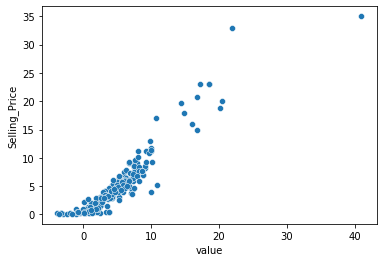

In [358]:
sns.scatterplot(x=predict_value,y=y_train); #plot scatterplot pridict and actual value shows relation between them.
plt.xlabel("value");

In [359]:
predict_value_test=model.predict(x_test)  # test data predict values 

In [347]:
Error_score=metrics.r2_score(predict_value_test,y_test)
Error_score

0.8730767360207001

### It clearly show over train model r2_score and test moel r2_score are same so over model is good fiting.

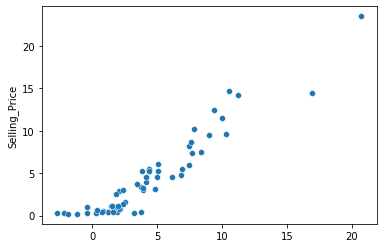

In [348]:
sns.scatterplot(x=predict_value_test,y=y_test);   #plot scatterplot pridict and actual value shows relation between them.

We build other model to compairing accuracy liner regretion model.

In [361]:
#Build LASSO Regretion model

In [350]:
model1=linear_model.Lasso()

In [351]:
model1.fit(x_train,y_train)

Lasso()

In [352]:
predict_value_lasso=model1.predict(x_train)

In [353]:
Error_score_lasso=metrics.r2_score(predict_value_lasso,y_train)
Error_score

0.8730767360207001

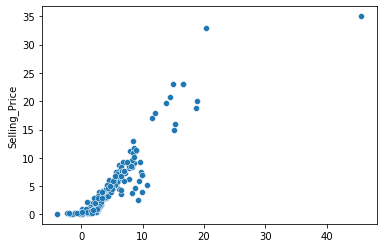

In [354]:
sns.scatterplot(x=predict_value_lasso,y=y_train);  #plot scatterplot pridict and actual value shows relation between them.

In [355]:
predict_value_lasso_test=model1.predict(x_test)

In [356]:
Error_score=metrics.r2_score(predict_value_lasso_test,y_test)
Error_score

0.8064359867721861

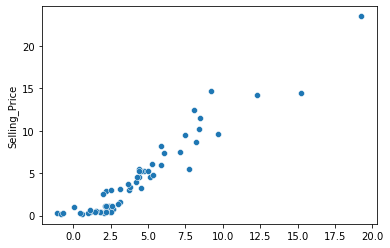

In [362]:
sns.scatterplot(x=predict_value_lasso_test,y=y_test);  #plot scatterplot pridict and actual value shows relation between them.

 ## Show Clearly lasso regretion model r2_score of test data is less than linear regration so  liner reg. is best fit over model.

## So, we use predict car price use liner reg.model fit. and got 85% accuracy predict price using this model.